In [14]:
pip install tensorflow==2.12.0

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\gadda\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for tensorflow==2.12.0 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for gast<=0.4.0,>=0.2.1 from https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast-0.4.0-py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Obtaining dependency information for jax>=0.3.15 from https://files.pythonhosted.org/packages/dc/d9/f387d9dfb2

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\gadda\\anaconda3\\Lib\\site-packages\\~-nsorflow\\compiler\\mlir\\quantization\\tensorflow\\calibrator\\pywrap_calibration.pyd'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for tensorflow==2.12.0 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for gast<=0.4.0,>=0.2.1 from https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast-0.4.0-py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Obtaining dependency information for jax>=0.3.15 from https://files.pythonhosted.org/packages/dc/d9/f387d9dfb2c

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

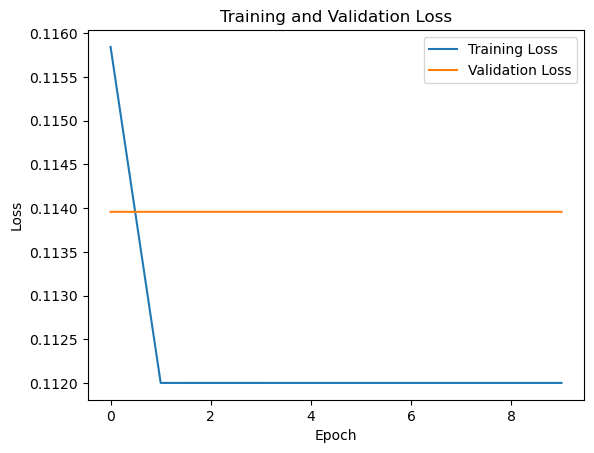

313/313 [==============================] - 3s 8ms/step


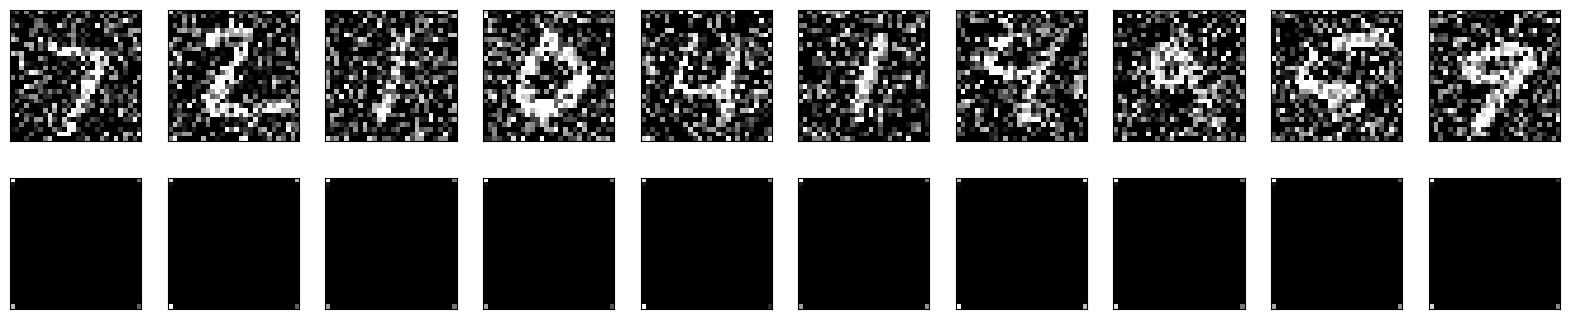

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, _), (test_images, _) = datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add random noise to create noisy versions of the images
noise_factor = 0.5
train_noisy_images = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape) 
test_noisy_images = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 

# Clip the values to be within the range [0, 1]
train_noisy_images = np.clip(train_noisy_images, 0., 1.)
test_noisy_images = np.clip(test_noisy_images, 0., 1.)

# Define the autoencoder model architecture
def build_autoencoder():
    input_img = tf.keras.Input(shape=(28, 28, 1))
    
    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = tf.keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# Build the autoencoder model
autoencoder = build_autoencoder()
autoencoder.summary()

# Train the autoencoder model
history = autoencoder.fit(train_noisy_images.reshape(-1, 28, 28, 1), train_images.reshape(-1, 28, 28, 1),
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(test_noisy_images.reshape(-1, 28, 28, 1), test_images.reshape(-1, 28, 28, 1)))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
decoded_images = autoencoder.predict(test_noisy_images.reshape(-1, 28, 28, 1))

# Display a few noisy and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_noisy_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
import numpy as np

# Define a function to create the autoencoder model
def create_autoencoder(learning_rate=0.001, batch_size=32, loss='binary_crossentropy', sparsity_reg=None):
    # Define the autoencoder model architecture
    # ...
    # (same as the previous example)
    # ...

    # Add sparsity regularization (optional)
    if sparsity_reg is not None:
        encoded_activity_regularizer = tf.keras.regularizers.l1(sparsity_reg)
        encoded.add_loss(tf.reduce_sum(encoded_activity_regularizer(encoded.output)))

    autoencoder = tf.keras.models.Model(inputs, decoded)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss=loss)

    return autoencoder

# Create a KerasRegressor wrapper for the autoencoder model
autoencoder_reg = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
losses = ['binary_crossentropy', 'mean_squared_error']
sparsity_reg_params = [0.0, 0.01, 0.1]  # L1 regularization parameters

# Option 1: Grid Search
param_grid = dict(learning_rate=learning_rates, batch_size=batch_sizes, loss=losses, sparsity_reg=sparsity_reg_params)
grid_search = GridSearchCV(estimator=autoencoder_reg, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_search = grid_search.fit(x_train_noisy.reshape(len(x_train_noisy), -1), x_train.reshape(len(x_train), -1))
print("Best hyperparameters (Grid Search): ", grid_search.best_params_)

# Option 2: Random Search
param_distributions = dict(learning_rate=np.logspace(-4, -1, 10),
                            batch_size=[32, 64, 128],
                            loss=['binary_crossentropy', 'mean_squared_error'],
                            sparsity_reg=np.logspace(-3, -1, 5))
random_search = RandomizedSearchCV(estimator=autoencoder_reg, param_distributions=param_distributions, n_iter=20, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search = random_search.fit(x_train_noisy.reshape(len(x_train_noisy), -1), x_train.reshape(len(x_train), -1))
print("Best hyperparameters (Random Search): ", random_search.best_params_)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'